<a href="https://colab.research.google.com/github/shanyageo1234/stress-detection-using-ML/blob/main/Stress_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#IMPORTING THE LIBRARIES USED IN OUR MODEL
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
#Read the DataSet
df=pd.read_csv('/content/drive/MyDrive/internship/stress.csv', encoding='latin1')

In [5]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [6]:
df.head(10)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,17554,1,1.0,1517274027,2,3.531124,...,1.000,1.1818,1.0,1.70415,1.44396,1.82046,0.75,5,4.338429,-0.550000
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,165,0,0.8,1512854409,6,8.331463,...,1.000,1.1250,1.0,1.66985,1.57757,1.89926,0.88,29,8.394244,0.277381
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,33053,1,0.8,1483582174,1,0.403679,...,1.000,1.1429,1.0,1.69549,1.44860,1.88963,1.00,0,1.028654,-0.079630
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,7581,1,0.6,1514843984,134,5.381111,...,1.000,1.0000,1.0,1.73571,1.71471,1.93607,0.94,43,5.991049,-0.272917
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1517,1,1.0,1490428087,20,1.562351,...,1.000,1.1250,1.0,1.74956,1.67353,1.89320,0.80,6,2.851935,-0.117262


In [7]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [8]:
df.isnull()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2834,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2835,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2836,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [11]:
df.shape

(2838, 116)

In [12]:
#importing the natural language tool kit
import nltk  #used to work with human language data for applying NLP
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
import nltk
import re
from nltk. corpus import stopwords
import string
nltk. download( 'stopwords' )
stemmer = nltk. SnowballStemmer("english")
stopword=set (stopwords . words ( 'english' ))

def clean(text):
    text = str(text) . lower()  #returns a string where all characters are lower case. Symbols and Numbers are ignored.

    text = re. sub('\[.*?\]',' ',text)  #substring and returns a string with replaced values.

    text = re. sub('https?://\S+/www\. \S+', ' ', text)#whitespace char with pattern.

    text = re. sub('<. *?>+', ' ', text)#special char enclosed in square brackets.

    text = re. sub(' [%s]' % re. escape(string. punctuation), ' ', text)#eliimportminate punctuation from string

    text = re. sub(' \n',' ', text)

    text = re. sub(' \w*\d\w*' ,' ', text)#word character ASCII punctuation

    text = [word for word in text. split(' ') if word not in stopword]  #removing stopwords
    text =" ". join(text)
    text = [stemmer . stem(word) for word in text. split(' ') ]#remove morphological affixes from words
    text = " ". join(text)
    return text
df [ "text"] = df["text"]. apply(clean)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


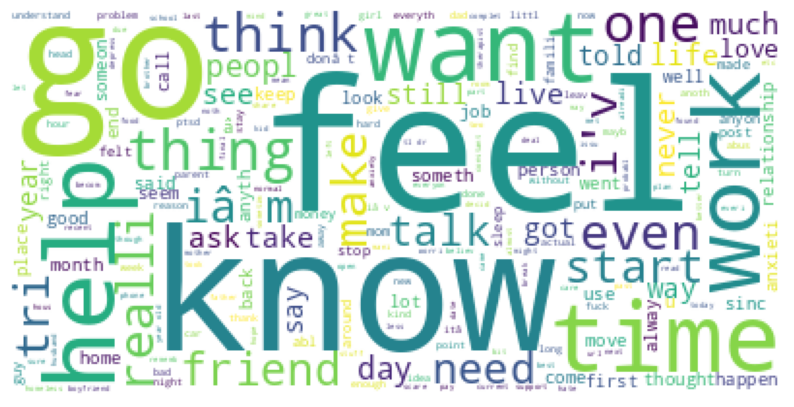

In [14]:
#dataset are generated and the world cloud works.
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white")
wordcloud.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show( )

# New section

In [15]:
#train and test split the model
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split

X = np.array (df["text"])
Y = np.array (df["label"])

cv = CountVectorizer ()
x = cv. fit_transform(X)
print(x)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, Y,test_size=0.33,random_state=42)

  (0, 7517)	1
  (0, 3321)	1
  (0, 9603)	1
  (0, 872)	1
  (0, 8486)	1
  (0, 3802)	1
  (0, 7323)	1
  (0, 9054)	1
  (0, 303)	1
  (0, 9912)	1
  (0, 4366)	1
  (0, 5109)	1
  (0, 5408)	1
  (0, 2221)	1
  (0, 5196)	1
  (0, 3308)	1
  (0, 2630)	3
  (0, 4249)	1
  (0, 5399)	1
  (0, 3748)	1
  (0, 8466)	1
  (0, 6968)	1
  (0, 4211)	1
  (0, 5253)	1
  (0, 1858)	1
  :	:
  (2836, 889)	1
  (2836, 4620)	1
  (2836, 2967)	1
  (2836, 4680)	1
  (2836, 4856)	1
  (2836, 4576)	1
  (2837, 7517)	2
  (2837, 3057)	1
  (2837, 5619)	2
  (2837, 8926)	1
  (2837, 8632)	1
  (2837, 6876)	1
  (2837, 4381)	1
  (2837, 9828)	1
  (2837, 5657)	1
  (2837, 9024)	1
  (2837, 5805)	1
  (2837, 2623)	1
  (2837, 7580)	1
  (2837, 2385)	1
  (2837, 7926)	1
  (2837, 2796)	1
  (2837, 9023)	1
  (2837, 5544)	1
  (2837, 3059)	1


# New section

In [16]:
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier()
#a=model.fit(Xtrain,Ytrain)

In [17]:

from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
a=model.fit(Xtrain,Ytrain)

In [18]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#a=model.fit(Xtrain,Ytrain)

In [19]:
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()
#a=model.fit(Xtrain,Ytrain)

In [20]:

#from sklearn import tree
#model=tree.DecisionTreeClassifier()
#a=model.fit(Xtrain,Ytrain)

# New section

In [22]:
#user can enter the input according to that input the below code genearte the value thatperson is suffered from stress or not.
user=input("Enter the text")
data=cv.transform([user]).toarray()
output=model.predict(data)
print(output)

Enter the texti am sad
[1]


# New section

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

#fitting the model X_train, Y_train and train and test its accuracy and score
a= model.fit(Xtrain,Ytrain)
print("the train accuracy:",model.score(Xtrain, Ytrain)*100,'%')
print("the test accuracy:",model.score(Xtest, Ytest)*100,'%')
score = a.score(Xtest, Ytest)
print(score)

#import accuracy score, classification report and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# predict the model for its test and find its accuracy score, classification report and confusion matrix
prediction=model.predict(Xtest)
print(f"Accuracy Score = {accuracy_score(Ytest,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Ytest,prediction)}")
print(f"Classification Report =\n {classification_report(Ytest,prediction)}")

#find cunfusion matrix, specificity, sensetivity and time taken
#confusion matrix
cm= confusion_matrix(Ytest,prediction)
print(f"Confusion Matrix =\n {confusion_matrix(Ytest,prediction)}")
#specificity
specificity=(cm[1,1]/(cm[1,1]+cm[1,0])*100)
print("specificity", specificity)

#sensitivity
sensitivity=(cm[0,0]/(cm[0,0]+cm[0,1])*100)
print("sensitivity", sensitivity)

#time taken
import time
start=time.time_ns()
a
end=time.time_ns()
t= ((end- start)/1000000) #time in ms
print("time =", t)







the train accuracy: 99.89479221462389 %
the test accuracy: 62.96691568836713 %
0.6296691568836713
Accuracy Score = 62.96691568836713
Confusion Matrix =
 [[268 181]
 [166 322]]
Classification Report =
               precision    recall  f1-score   support

           0       0.62      0.60      0.61       449
           1       0.64      0.66      0.65       488

    accuracy                           0.63       937
   macro avg       0.63      0.63      0.63       937
weighted avg       0.63      0.63      0.63       937

Confusion Matrix =
 [[268 181]
 [166 322]]
specificity 65.98360655737704
sensitivity 59.68819599109132
time = 0.05128


In [ ]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()

#fitting the model Xtrain, Ytrain and train and test its accuracy and score
a= model.fit(Xtrain,Ytrain)
print("the train accuracy:",model.score(Xtrain, Ytrain)*100,'%')
print("the test accuracy:",model.score(Xtest, Ytest)*100,'%')
score = a.score(Xtest, Ytest)
print(score)

#import accuracy score, classification report and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# predict the model for its test and find its accuracy score, classification report and confusion matrix
prediction=model.predict(Xtest)
print(f"Accuracy Score = {accuracy_score(Ytest,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Ytest,prediction)}")
print(f"Classification Report =\n {classification_report(Ytest,prediction)}")

#find cunfusion matrix, specificity, sensetivity and time taken
#confusion matrix
cm= confusion_matrix(Ytest,prediction)
print(f"Confusion Matrix =\n {confusion_matrix(Ytest,prediction)}")
#specificity
specificity=(cm[1,1]/(cm[1,1]+cm[1,0])*100)
print("specificity", specificity)

#sensitivity
sensitivity=(cm[0,0]/(cm[0,0]+cm[0,1])*100)
print("sensitivity", sensitivity)

#time taken
import time
start=time.time_ns()
a
end=time.time_ns()
t= ((end- start)/1000000) #time in ms
print("time =", t)







the train accuracy: 94.21357180431352 %
the test accuracy: 72.89220917822838 %
0.7289220917822838
Accuracy Score = 72.89220917822838
Confusion Matrix =
 [[264 185]
 [ 69 419]]
Classification Report =
               precision    recall  f1-score   support

           0       0.79      0.59      0.68       449
           1       0.69      0.86      0.77       488

    accuracy                           0.73       937
   macro avg       0.74      0.72      0.72       937
weighted avg       0.74      0.73      0.72       937

Confusion Matrix =
 [[264 185]
 [ 69 419]]
specificity 85.86065573770492
sensitivity 58.797327394209354
time = 0.07656


In [23]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()

#fitting the model X_train, Y_train and train and test its accuracy and score
model.fit(Xtrain,Ytrain)
print("the train accuracy:",model.score(Xtrain, Ytrain)*100,'%')
print("the test accuracy:",model.score(Xtest, Ytest)*100,'%')
score = a.score(Xtest, Ytest)
print(score)

#import accuracy score, classification report and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# predict the model for its test and find its accuracy score, classification report and confusion matrix
prediction=model.predict(Xtest)
print(f"Accuracy Score = {accuracy_score(Ytest,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Ytest,prediction)}")
print(f"Classification Report =\n {classification_report(Ytest,prediction)}")

# find confusion matrix, specificity, sensitivity and time taken
#confusion matrix
cm= confusion_matrix(Ytest,prediction)
print(f"Confusion Matrix =\n {confusion_matrix(Ytest,prediction)}")

#specificity
specificity=(cm[1,1]/(cm[1,1]+cm[1,0])*100)
print("specificity", specificity)

#sensitivity
sensitivity=(cm[0,0]/(cm[0,0]+cm[0,1])*100)
print("sensitivity", sensitivity)

#time taken
import time
start=time.time_ns()
a
end=time.time_ns()
t= ((end- start)/1000000) #time in ms
print("time =", t)

the train accuracy: 99.89479221462389 %
the test accuracy: 70.86446104589115 %
0.7310565635005336
Accuracy Score = 70.86446104589115
Confusion Matrix =
 [[264 200]
 [ 73 400]]
Classification Report =
               precision    recall  f1-score   support

           0       0.78      0.57      0.66       464
           1       0.67      0.85      0.75       473

    accuracy                           0.71       937
   macro avg       0.73      0.71      0.70       937
weighted avg       0.72      0.71      0.70       937

Confusion Matrix =
 [[264 200]
 [ 73 400]]
specificity 84.56659619450318
sensitivity 56.896551724137936
time = 0.050179
